<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/3_Linear_Models_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Models**   
We saw knn technique in the [earlier notebook](https://github.com/Nirzaree/MLWithPython/blob/master/ML_Learning_101_KNN.ipynb). Linear model is a complementary technique to knn for supervised learning.

> k-nearest-neighbors   
- Makes few assumptions about the input data structure
- Gives potentially accurate but sometimes unstable predictions

> Linear Model
- Make strong asssumptions about the input data structure
- Gives stable but potentially inaccurate predictions 





### Concept

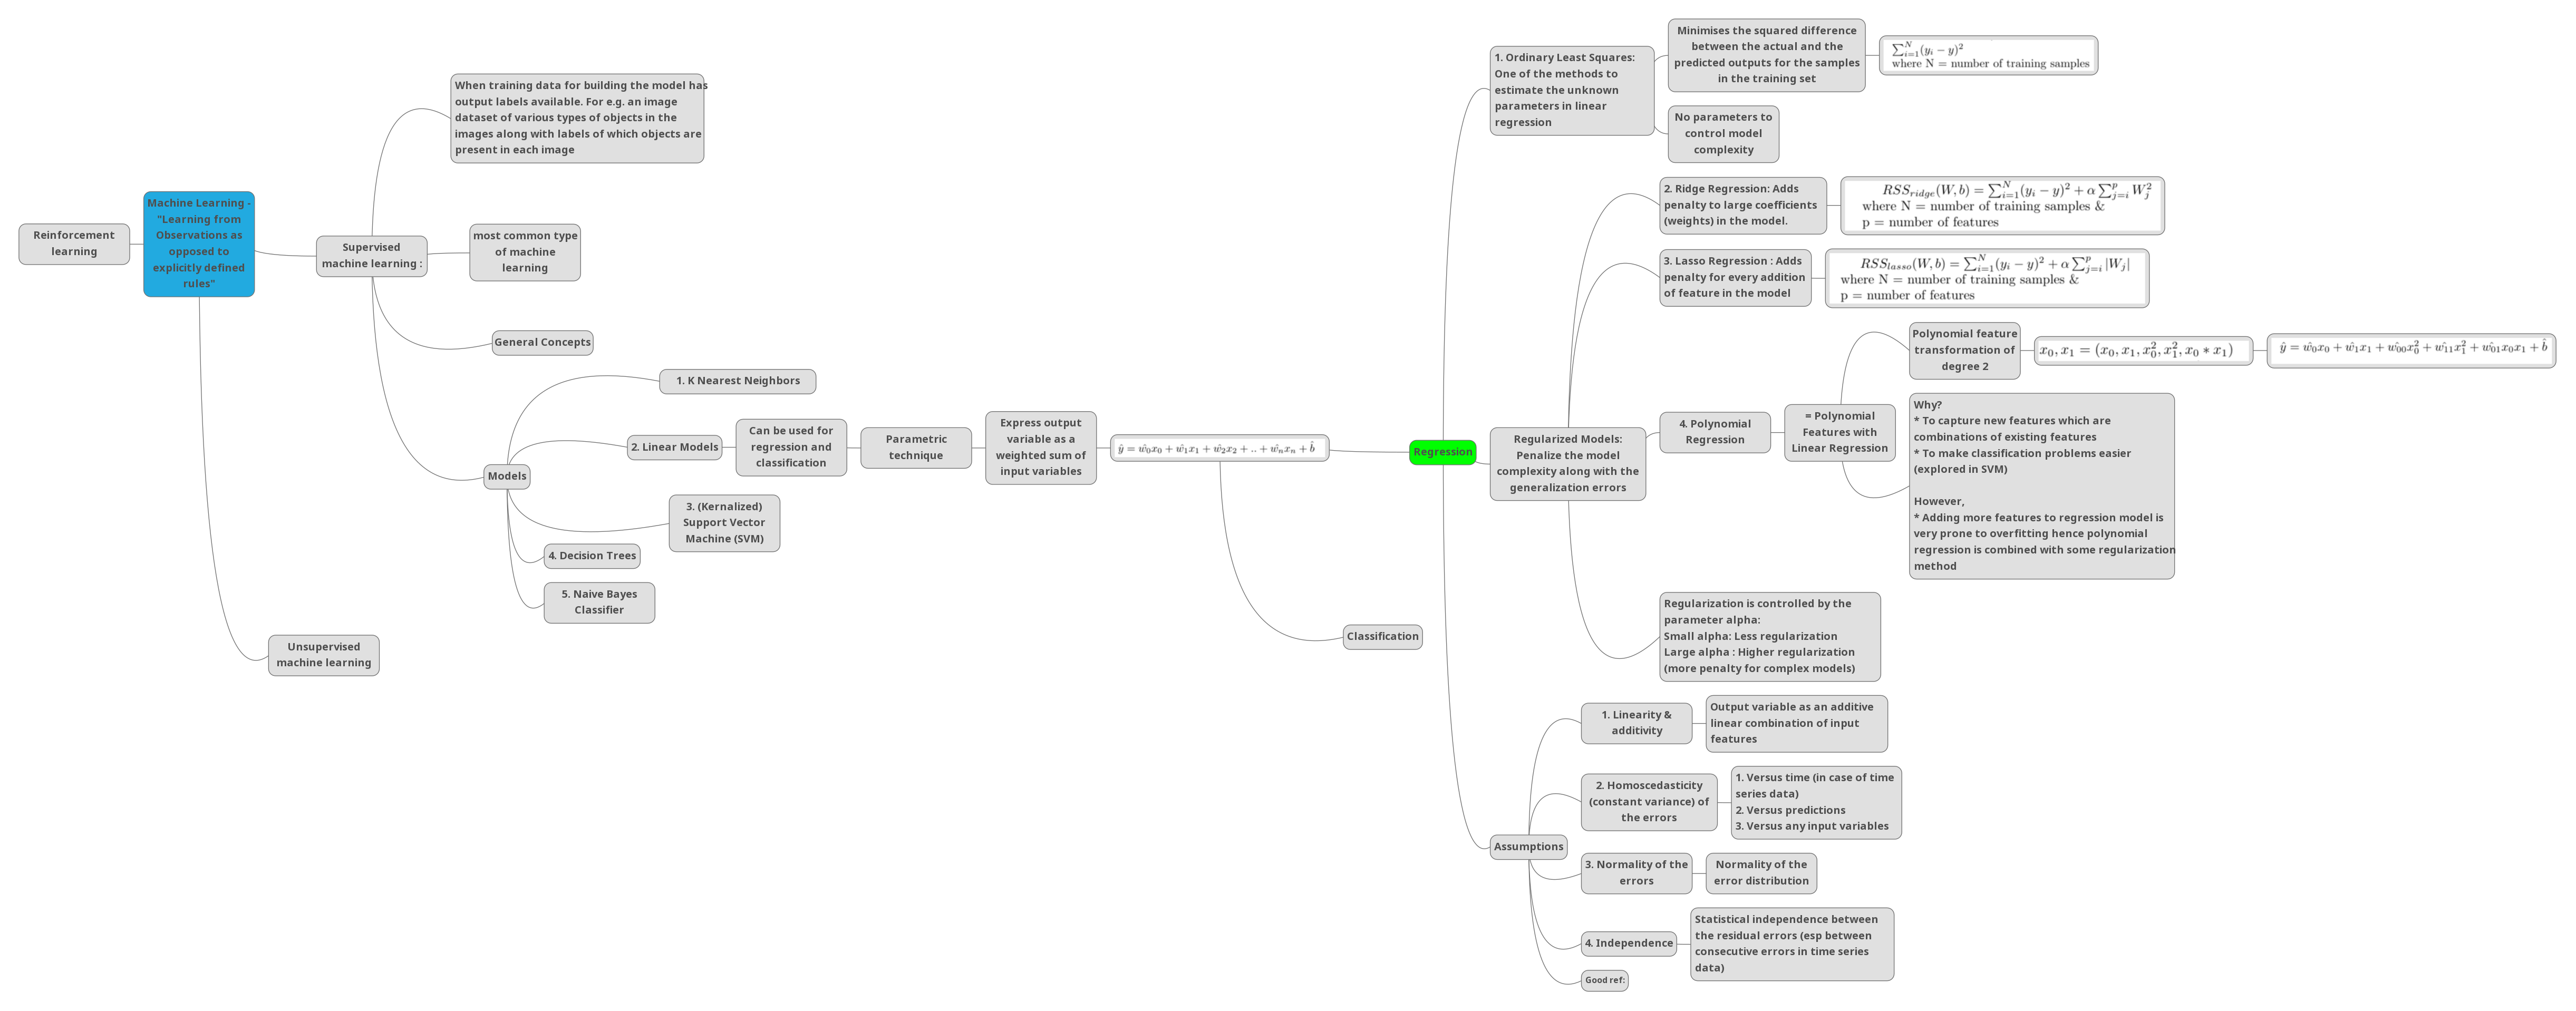

#Case studies 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. One feature synthetic dataset

#### Linear Regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns


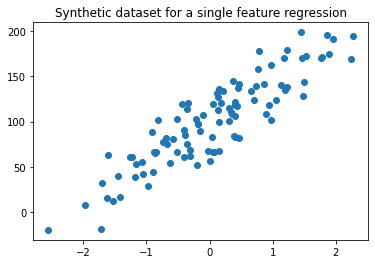

In [ ]:
x_R1,y_R1 = make_regression(n_samples=100,n_features=1,noise=20,n_informative=1,random_state=0,bias = 100)
plt.figure()
plt.title('Synthetic dataset for a single feature regression')
plt.scatter(x_R1,y_R1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x_R1,y_R1,random_state=0)

In [ ]:
linregmodel = LinearRegression()
linregmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Model coefficient = {}'.format(linregmodel.coef_))

print('Model intercept = {:.3f}'.format(linregmodel.intercept_))

print('R Squared score (training) = {:.3f}'.format(linregmodel.score(X_train,y_train)))

print('R Squared score (testing) = {:.3f}'.format(linregmodel.score(X_test,y_test)))

Model coefficient = [44.60097138]
Model intercept = 98.964
R Squared score (training) = 0.819
R Squared score (testing) = 0.726


Text(0, 0.5, 'Target variable')

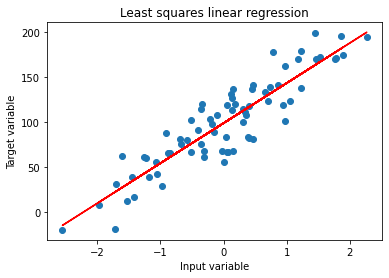

In [ ]:
###plot lin reg
plt.scatter(X_train,y_train)
plt.plot(X_train,linregmodel.predict(X_train),'r')
plt.title('Least squares linear regression')
plt.xlabel('Input variable')
plt.ylabel('Target variable')

### 2. Boston housing dataset 

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
BostonData = load_boston()

In [ ]:
print(BostonData.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
dfBoston = pd.DataFrame(BostonData.data,columns=BostonData.feature_names)
dfBoston = pd.concat([dfBoston,pd.Series(BostonData.target,name='MEDV')],axis=1)

In [ ]:
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
dfBoston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
dfBoston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


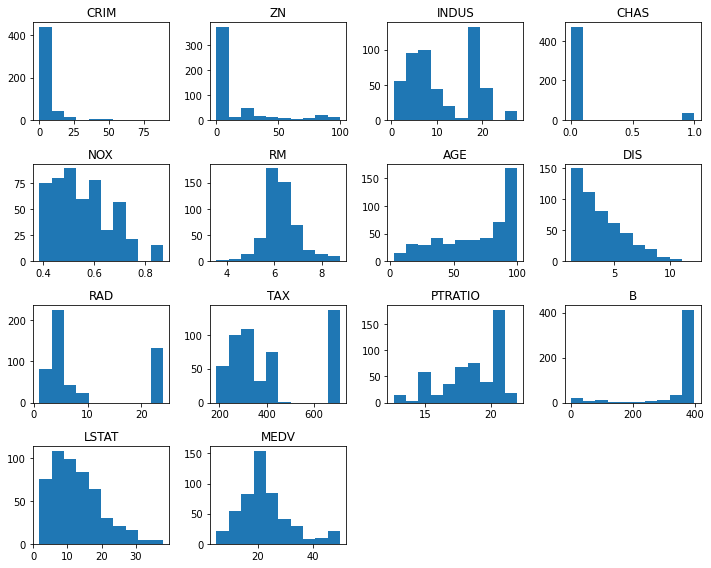

In [ ]:
dfBoston.hist(grid=False,figsize = (10,8))
plt.tight_layout()

* Note: 

  All MEDV values above 50 has been capped to 50. These are mostly outliers, so we remove them from the analysis. 

In [ ]:
dfBoston = dfBoston[dfBoston.MEDV < 50]

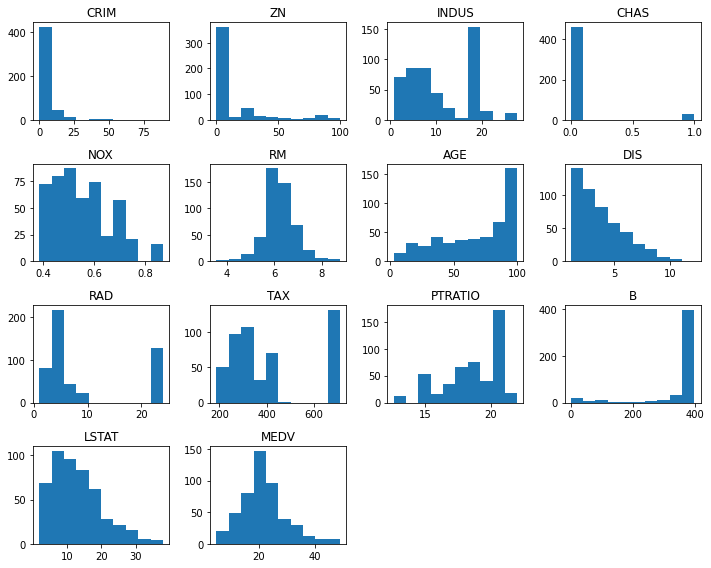

In [ ]:
dfBoston.hist(grid=False,figsize = (10,8))
plt.tight_layout()

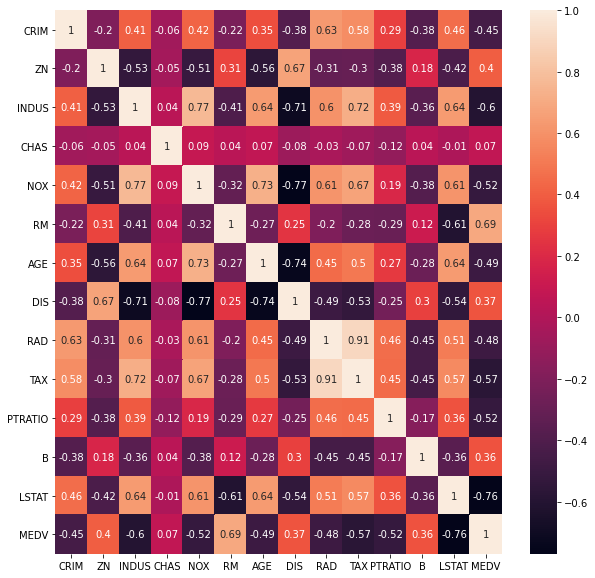

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(round(dfBoston.corr(),2),annot=True)

* Observations:
  1. CHAS being a binary feature is not helpful in the regression analysis hence we can remove it.
  2. Among the given features,  % lower status in the population (LSTAT),avg number of rooms per person (RM), Pupil teacher ratio per town (PTRatio), proportion of non-retail business acres per town (INDUS), full value property tax rate (per 10000 USD) & proportion of Nitric Oxide concentration are correlating to a considerable extent to the output variable (Median value of house in 1000s USD)


Next steps:
1. Remove the CHAS variable
2. Scale all variables to be in the same range
3. Run a linear regression model 

In [ ]:
dfBoston.drop(['CHAS'],axis=1,inplace=True)

In [ ]:
dfBoston.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Linear Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(dfBoston.drop('MEDV',axis=1),dfBoston.MEDV,random_state=0,test_size = 0.2)

In [ ]:
modelpipeline = Pipeline([('Scaler',MinMaxScaler()),('Model',LinearRegression())])

In [ ]:
modelpipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
print('R2 training data : Boston housing : linear regression = ',modelpipeline.score(X_train,y_train))

R2 training data : Boston housing : linear regression =  0.7803623473368627


In [ ]:
print('R2 test data : Boston housing : linear regression = ',modelpipeline.score(X_test,y_test))

R2 test data : Boston housing : linear regression =  0.7591768167902861


##### Testing the linear regression assumptions

###### 1. Linearity

Text(0.5, 1.0, 'Actual vs Predicted (training data)')

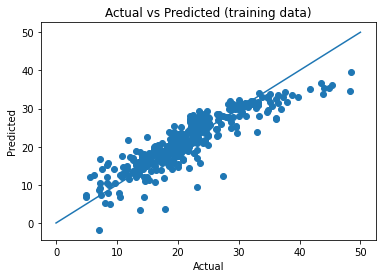

In [ ]:
plt.scatter(y_train,modelpipeline.predict(X_train))
plt.plot(np.linspace(0,50,100),np.linspace(0,50,100))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (training data)')

* Linearity fails to be satisfied for values > 40. The model is underpredicting for values > 40. 

###### 2. Normality of residuals

In [ ]:
residuals_training = y_train - modelpipeline.predict(X_train)

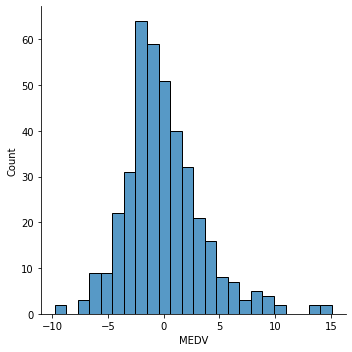

In [ ]:
sns.displot(residuals_training)

In [ ]:
import scipy.stats as stats

((array([-2.91707214, -2.62850148, -2.46572851, -2.35005202, -2.25924608,
         -2.18395743, -2.11932901, -2.06250202, -2.01164606, -1.96551592,
         -1.9232246 , -1.88411705, -1.84769527, -1.81357142, -1.78143737,
         -1.75104405, -1.72218717, -1.69469702, -1.66843096, -1.64326798,
         -1.61910443, -1.59585088, -1.57342957, -1.55177245, -1.53081964,
         -1.51051812, -1.49082075, -1.47168538, -1.4530742 , -1.43495315,
         -1.41729142, -1.40006105, -1.3832366 , -1.36679482, -1.35071445,
         -1.33497596, -1.31956136, -1.30445409, -1.2896388 , -1.27510129,
         -1.26082838, -1.24680779, -1.23302811, -1.21947866, -1.20614946,
         -1.19303118, -1.18011506, -1.16739287, -1.15485687, -1.14249978,
         -1.13031472, -1.11829522, -1.10643514, -1.09472868, -1.08317036,
         -1.07175496, -1.06047754, -1.04933341, -1.03831809, -1.02742733,
         -1.0166571 , -1.00600352, -0.99546292, -0.98503177, -0.97470672,
         -0.96448454, -0.95436217, -0.

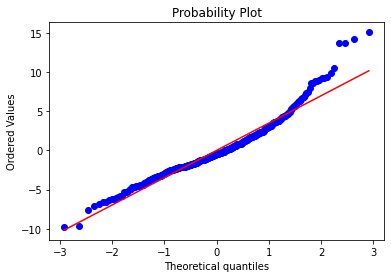

In [ ]:
stats.probplot(residuals_training,plot=plt)

* Observations: 
  * At the tails, esp the upper tail, the data is not gaussian. 

 * Ways to deal with this:  
    * Transform the features or the output variable  
    * Try glm instead of linear regression 
    * Bootstrapping (TODO: Read up about this)  

* Run Anderson-Darling test 

In [ ]:
from statsmodels.stats.diagnostic import normal_ad

In [ ]:
normal_ad(residuals_training)

(5.113947924585659, 1.1749426818474544e-12)

In [ ]:
if(normal_ad(residuals_training)[1] < 0.05):
  print("p value = {} which is less than 0.05 hence normality assumption is violated".format(normal_ad(residuals_training)[1]))
else:
  print("p value = {} being >= 0.05 hence normality assumption is fulfilled".format(normal_ad(residuals_training)[1]))

p value = 1.1749426818474544e-12 which is less than 0.05 hence normality assumption is violated


###### 3. No perfect collinearity between features

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
VIF = pd.DataFrame(columns=['var','vif'])

In [ ]:
VIF['var'] = dfBoston.columns.drop('MEDV')

In [ ]:
VIF['vif'] = [variance_inflation_factor(X_train[VIF['var']].values,i) for i in range(len(VIF['var']))]

In [ ]:
VIF[VIF.vif > 10]

,var,vif
2,INDUS,14.605126
3,NOX,69.319519
4,RM,88.446840
5,AGE,21.217132
6,DIS,15.795246
7,RAD,14.617051
8,TAX,56.543415
9,PTRATIO,96.735776
10,B,20.055323
11,LSTAT,12.161420


* With 11 variables having VIF > 10, there is possible multicollinearity. 

* With no variables crossing 100 in multicollinearity there are no instances of definite multicollinearity. 

###### 4. Constant variance of residuals (Homoskedasticity)

* Against fitted values

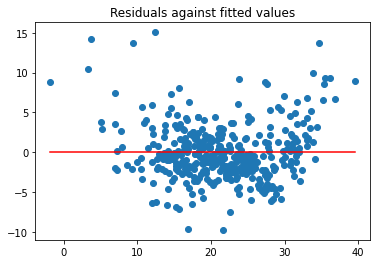

In [ ]:
plt.scatter(modelpipeline.predict(X_train),residuals_training)
plt.title('Residuals against fitted values')
plt.plot(np.linspace(min(modelpipeline.predict(X_train)),
                     max(modelpipeline.predict(X_train)),
                     50),np.array([0 for _ in range(50)]),'r-')

* As we expected there are higher errors at the tails (lower and higher predicted values), hence the plot is not homoskedastic. 

* Against features

In [ ]:
dfFeatPred = pd.concat([X_train,y_train],axis=1)

In [ ]:
dfFeatPred['pred'] = modelpipeline.predict(X_train)

In [ ]:
dfFeatPred['res'] = dfFeatPred['MEDV'] - dfFeatPred['pred']

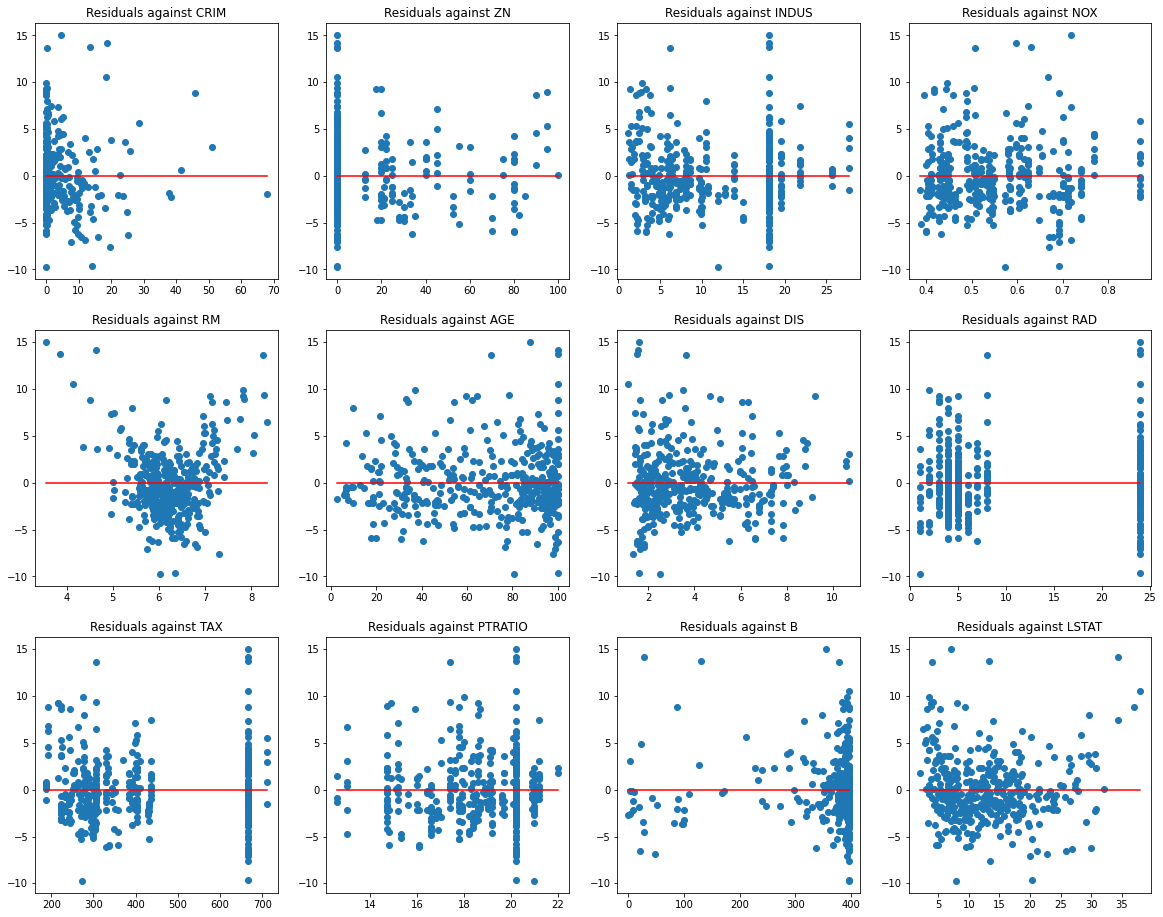

In [ ]:
plt.figure(figsize=(20,16))
nrow = 3
ncol = 4
ind = 1
for featname in X_train.columns:
  plt.subplot(nrow,ncol,ind)
  plt.scatter(dfFeatPred[featname],dfFeatPred['res'])
  plt.plot(np.linspace(min(dfFeatPred[featname]),
                     max(dfFeatPred[featname]),
                     50),np.array([0 for _ in range(50)]),'r-')
  plt.title('Residuals against {}'.format(featname))
  ind += 1

* Residuals are not homoscedastic partly as the features are not normally distributed. 

* While no real world dataset would satisfy each of the assumption completely, running these tests are important to interpret the model and know the ranges of feature values and/or fitted values where the model might fail to give accurate predictions. 

* In this case, predictions in the high ranges of the prices can be inaccurate. 

* TODO: more detailed analysis of the thresholds on these tests and the impact of each of the violations on the model interpretation. 


Good Resources for Linear Regression assumptions:
1. https://boostedml.com/2018/08/testing-linear-regression-assumptions-the-kaggle-housing-price-dataset.html

2. https://people.duke.edu/~rnau/testing.htm

3. https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RidgePipeline = Pipeline([('Scaler',MinMaxScaler()),('Model',Ridge(alpha=0.05))])

In [ ]:
RidgePipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Model',
                 Ridge(alpha=0.05, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [ ]:
print('R2 training data : Boston housing : Ridge regression = ',RidgePipeline.score(X_train,y_train))

R2 training data : Boston housing : Ridge regression =  0.780347975595187


In [ ]:
print('R2 test data : Boston housing : Ridge regression = ',RidgePipeline.score(X_test,y_test))

R2 test data : Boston housing : Ridge regression =  0.7589154786859655


In [ ]:
RidgePipeline.get_params()

{'Model': Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'Model__alpha': 0.05,
 'Model__copy_X': True,
 'Model__fit_intercept': True,
 'Model__max_iter': None,
 'Model__normalize': False,
 'Model__random_state': None,
 'Model__solver': 'auto',
 'Model__tol': 0.001,
 'Scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'Scaler__copy': True,
 'Scaler__feature_range': (0, 1),
 'memory': None,
 'steps': [('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('Model', Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
         normalize=False, random_state=None, solver='auto', tol=0.001))],
 'verbose': False}

#### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
LassoPipeline = Pipeline([('Scaler',MinMaxScaler()),('Model',Lasso(alpha=0.01))])

In [ ]:
LassoPipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Model',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [ ]:
print('R2 training data : Boston housing : Lasso regression = ',LassoPipeline.score(X_train,y_train))

R2 training data : Boston housing : Lasso regression =  0.7790419399801071


In [ ]:
print('R2 test data : Boston housing : Lasso regression = ',LassoPipeline.score(X_test,y_test))

R2 test data : Boston housing : Lasso regression =  0.7574361950849906


In [ ]:
LassoPipeline.get_params()

{'Model': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'Model__alpha': 0.01,
 'Model__copy_X': True,
 'Model__fit_intercept': True,
 'Model__max_iter': 1000,
 'Model__normalize': False,
 'Model__positive': False,
 'Model__precompute': False,
 'Model__random_state': None,
 'Model__selection': 'cyclic',
 'Model__tol': 0.0001,
 'Model__warm_start': False,
 'Scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'Scaler__copy': True,
 'Scaler__feature_range': (0, 1),
 'memory': None,
 'steps': [('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('Model', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=None,
         selection='cyclic', tol=0.0001, warm_start=False))],
 'verbose': False}

* Observation: 
  1. Not a lot of variation in the linear models (with mostly default settings).
  2. More tuning of alpha parameter in the regularized linear models needs to be done to understand if regularized linear model has an edge over OLS in this dataset. 

### 3. Crime Dataset ([ADSPY course Coursera](https://github.com/Qian-Han/coursera-Applied-Data-Science-with-Python))

In [ ]:
#import the shared utilities file & its dependency 
# https://stackoverflow.com/questions/48905127/importing-py-files-in-google-colab?noredirect=1&lq=1

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!cp '/content/drive/My Drive/Colab Notebooks/adspy_shared_utilities.py' .
!cp '/content/drive/My Drive/Colab Notebooks/CommViolPredUnnormalizedData.txt' .

In [ ]:
from adspy_shared_utilities import load_crime_dataset

In [ ]:
X_crime,y_crime = load_crime_dataset()

In [ ]:
X_crime

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,...,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,...,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,...,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,...,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,...,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,195,250,309,114,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.00,21577,75.78,1.00,41.15,29.31,7.12,14.09,27705,11878,23223,17.78,8.76,23.03,20.66,5.72,59.02,14.31,26.83,14.72,23.42,11.40,33.32,14.46,13.04,2.89,71.94,69.79,79.76,75.33,62.96,70.52,1511,...,0.57,0.68,96.87,0.60,3.08,1.92,2.28,2.37,2.16,57.81,2.11,53.19,2,5119,91.81,55.50,2.09,26.22,1966,6.13,0.31,37700,53900,73100,35400,215,280,349,134,340,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,15.46,30.16,14.34,8.08,56216,100.00,24727,75.05,1.12,31.42,21.45,19.98,14.41,27388,10237,13804,25.06,17.12,30.87,15.79,9.99,55.53,13.47,27.18,16.38,25.02,10.22,31.91,16.28,13.34,3.56,67.04,64.81,76.19,72.78,47.24,55.38,1960,...,7.96,11.40,65.33,11.87,13.49,9.91,3.03,2.83,3.19,41.69,16.89,57.23,2,683,96.40,44.63,1.46,13.18,1973,4.91,0.55,71200,91100,118900,47700,298,374,455,1

In [ ]:
type(X_crime)

pandas.core.frame.DataFrame

In [ ]:
sum(X_crime.isnull().sum())

0

#### Linear Regression

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_crime,y_crime,random_state=0,test_size = 0.2)

In [ ]:
LinRegCrime = LinearRegression()

In [ ]:
LinRegCrime.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Model coefficients:",LinRegCrime.coef_)

Model coefficients: [ 1.44687293e-03 -1.09286884e+02  1.03651000e+01 -3.09065898e+01
  3.03610122e+00 -1.69300762e+01 -2.23044504e-03  1.52307501e+00
 -1.32185250e-02 -9.60304208e+00  2.22786553e+01 -6.12114052e+00
  9.70000040e+00 -4.42719417e-01 -8.76650002e+00  1.01739038e-02
  1.83664593e-03  4.05175496e-03 -4.99213167e+00 -1.60470005e+01
  8.23415603e+00 -1.63681979e+00 -3.13460987e-01  9.58554662e+00
 -3.21121652e+00 -2.22874569e+00  2.76280205e+00  9.45670036e+00
  7.54906105e+01  1.29334106e+01  4.23687678e+01 -1.17736109e+02
 -2.30619491e+02  4.81540788e+00 -2.50871071e+01  2.09541434e+00
  4.39414814e-01  4.15036479e+00 -1.01559327e+01 -3.16310241e-03
  3.95499120e+01 -1.06082621e-03  1.74584644e+00  2.08977800e+00
 -4.73528582e+00  2.38424546e+00 -1.69584920e+01 -5.57154211e+01
  7.73326864e+01 -3.43004504e+01 -7.99330974e-01 -3.37900112e+01
  2.71368912e+01 -5.30131759e+01  8.00653031e+02  8.51498219e+01
 -3.39164222e+02 -3.35128179e+01  2.39611497e+01  4.84810150e+00
  6.3

In [ ]:
print("Model intercept: ",LinRegCrime.intercept_)

Model intercept:  -1293.7836768907782


In [ ]:
print("R2 (training): ",LinRegCrime.score(X_train,y_train))

R2 (training):  0.6742779427767065


In [ ]:
print("R2 (test): ",LinRegCrime.score(X_test,y_test))

R2 (test):  0.4722783703569021


#### Ridge Regression

In [ ]:
RidgeRegCrime = Ridge()

In [ ]:
RidgeRegCrime.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print("Model coefficients:",RidgeRegCrime.coef_)

Model coefficients: [ 1.52719636e-03 -5.23254208e+01  7.97538069e+00 -3.36953939e+01
  7.25537579e+00 -1.77337048e+01 -2.31999038e-03  1.55510610e+00
 -1.12622014e-02 -8.85860219e+00  2.02338886e+01 -6.14867525e+00
  9.47122620e+00 -3.49212520e-01 -8.38789398e+00  9.08899024e-03
  1.74809679e-03  4.15324295e-03 -4.79152998e+00 -1.66800969e+01
  8.46860227e+00 -1.75943920e+00  5.80404401e-01  1.03765506e+01
 -3.16467718e+00 -2.21192801e+00  3.04197507e+00  9.02862692e+00
  6.52507140e+01  1.16338545e+01  3.35086767e+01 -1.02162555e+02
 -3.22981545e+00  4.22178160e+00 -2.51729992e+01  2.17873166e+00
  5.45190087e-01  4.01385062e+00 -1.01828072e+01 -3.16294356e-03
  3.87996368e+01 -1.08631566e-03  1.79973377e+00  1.88337826e+00
 -4.56951361e+00  2.24347737e+00 -2.17226425e+01 -4.73811647e+01
  7.15859067e+01 -3.16229412e+01 -7.19299670e-01 -3.27527894e+01
  1.24753503e+01 -3.49753560e+01  3.34820399e+02  1.98943055e+02
 -2.78382583e+02 -3.67345318e+01  2.50526263e+01  4.45525067e+00
  6.1

In [ ]:
print("Ridge Model intercept: ",RidgeRegCrime.intercept_)

Ridge Model intercept:  -1837.494517810318


In [ ]:
print("Ridge model: R2 (training): ",RidgeRegCrime.score(X_train,y_train))

Ridge model: R2 (training):  0.674005470998607


In [ ]:
print("Ridge model: R2 (test): ",RidgeRegCrime.score(X_test,y_test))

Ridge model: R2 (test):  0.4727363945704309


##### Ridge with feature scaling

In [ ]:
RidgePipeline = Pipeline([('scaler',MinMaxScaler()),('model',Ridge(alpha=20))])

In [ ]:
RidgePipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [ ]:
# dir(RidgePipeline)

In [ ]:
print("Ridge Model with feature scaling Model coefficients:",RidgePipeline._final_estimator.coef_)

Ridge Model with feature scaling Model coefficients: [ 9.35729986e+01  6.96288912e+00 -4.99828554e+01 -8.74587212e+01
 -6.95572657e+01 -3.90405940e+00  9.26088775e+01  1.49828543e+02
  1.85300370e+01 -3.18372704e+01 -4.14420130e+01 -2.05776095e+02
 -1.63796991e+00  1.10465745e+02 -9.57088826e+01 -4.85660530e-01
  2.88621775e+01  9.44994155e+01  5.83738786e+01 -6.88184486e+01
  1.07694260e+02 -4.21695820e+00  1.57356552e+01  7.48501545e-01
 -1.00907050e+02 -2.57723083e+01 -1.44426348e+01  2.73297167e+01
  1.64216363e+02  9.64440851e+01  8.04144751e+01  1.29391530e+02
  8.94486360e+01 -3.39581722e+02 -4.53539828e+02 -2.80868114e+02
 -2.56443190e+02  2.43226689e+01 -9.43488567e+01  1.15738585e+02
  5.28492216e+02  2.56410706e+01  6.44977946e+00 -2.76140154e+01
 -1.03528991e+01  6.78297443e+01  1.31028924e+01  2.30717591e+01
  5.24817264e+01  6.73559140e+01  6.37194727e+01 -6.38394225e+01
  1.06899044e+02  5.04142857e+01  4.84163766e+01 -1.05216003e+01
  5.96980566e+01 -4.57751457e+01  1.0

In [ ]:
print("Number of larger coefficients (> 1.0)",sum(abs(RidgePipeline._final_estimator.coef_) > 1.0))

Number of larger coefficients (> 1.0) 86


In [ ]:
print("Number of larger coefficients (> 2.0)",sum(abs(RidgePipeline._final_estimator.coef_) > 2.0))

Number of larger coefficients (> 2.0) 84


In [ ]:
print("Ridge Model with feature scaling intercept: ",RidgePipeline._final_estimator.intercept_)

Ridge Model with feature scaling intercept:  961.1290352040037


In [ ]:
print("Ridge model with feature scaling: R2 (training): ",RidgePipeline.score(X_train,y_train))

Ridge model with feature scaling: R2 (training):  0.6186712832613455


In [ ]:
print("Ridge model with feature scaling: R2 (test): ",RidgePipeline.score(X_test,y_test))

Ridge model with feature scaling: R2 (test):  0.5843586088036602


In [ ]:
print('Varying regularization in Ridge regression')

for alpha_itn in [0.01,0.05,0.1,0.5,1,2,10,20,30,40,50]:
  ridgemodel = Pipeline([('scaler',MinMaxScaler()),('model',Ridge(alpha=alpha_itn))])
  ridgemodel.fit(X_train,y_train)
  print("Alpha = ",alpha_itn)
  print("R2(Train) = ",ridgemodel.score(X_train,y_train))
  print("R2(Test) = ",ridgemodel.score(X_test,y_test))
  print("Bigger (> 2.0) coef = ",np.sum(abs(ridgemodel._final_estimator.coef_) > 2.0))
  print("--------------------------------------------")

Varying regularization in Ridge regression
Alpha =  0.01
R2(Train) =  0.6740121243469499
R2(Test) =  0.48048351091496755
Bigger (> 2.0) coef =  88
--------------------------------------------
Alpha =  0.05
R2(Train) =  0.6730193841705737
R2(Test) =  0.4950051278416582
Bigger (> 2.0) coef =  88
--------------------------------------------
Alpha =  0.1
R2(Train) =  0.6719737575613931
R2(Test) =  0.5053871857154794
Bigger (> 2.0) coef =  88
--------------------------------------------
Alpha =  0.5
R2(Train) =  0.6664215570001433
R2(Test) =  0.5303135800589169
Bigger (> 2.0) coef =  88
--------------------------------------------
Alpha =  1
R2(Train) =  0.6619472929672165
R2(Test) =  0.5386967574557495
Bigger (> 2.0) coef =  88
--------------------------------------------
Alpha =  2
R2(Train) =  0.6559986689638324
R2(Test) =  0.5471721583367316
Bigger (> 2.0) coef =  87
--------------------------------------------
Alpha =  10
R2(Train) =  0.6339924146793767
R2(Test) =  0.5760822038028992
B

* Alpha = 20 seems to be a good value 

* TODO: Why alpha increase does not monotonically decrease larger coeffs? 

#### Lasso Regression

In [ ]:
LassoPipeline = Pipeline([('scaler',MinMaxScaler()),('model',Lasso())])

In [ ]:
LassoPipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [ ]:
print("Lasso Model: Crime Dataset: R2 training",LassoPipeline.score(X_train,y_train))
print("Lasso Model: Crime Dataset: R2 test",LassoPipeline.score(X_test,y_test))
print("Lasso Model: Crime Dataset: nonzero coeff",len(LassoPipeline._final_estimator.coef_))

Lasso Model: Crime Dataset: R2 training 0.6433051602915093
Lasso Model: Crime Dataset: R2 test 0.5941077626823565
Lasso Model: Crime Dataset: nonzero coeff 88


In [ ]:
print('Varying regularization in Lasso regression')

for alpha_itn in [0.01,0.05,0.1,0.5,1,2,10,20,30,40,50]:
  lassomodel = Pipeline([('scaler',MinMaxScaler()),('model',Lasso(alpha=alpha_itn,max_iter=10000))])
  lassomodel.fit(X_train,y_train)
  print("Alpha = ",alpha_itn)
  # print(lassomodel._final_estimator.coef_)
  print("R2(Train) = ",lassomodel.score(X_train,y_train))
  print("R2(Test) = ",lassomodel.score(X_test,y_test))
  print("Nonzero coef = ",sum(lassomodel._final_estimator.coef_ > 0))
  print("--------------------------------------------")

Varying regularization in Lasso regression
Alpha =  0.01
R2(Train) =  0.673910060639906
R2(Test) =  0.4807175092146404
Nonzero coef =  43
--------------------------------------------
Alpha =  0.05
R2(Train) =  0.6714550025120145
R2(Test) =  0.5177598919533863
Nonzero coef =  35
--------------------------------------------
Alpha =  0.1
R2(Train) =  0.6687006375352758
R2(Test) =  0.5307997131379234
Nonzero coef =  31
--------------------------------------------
Alpha =  0.5
R2(Train) =  0.6515888305917071
R2(Test) =  0.5681042909553233
Nonzero coef =  18
--------------------------------------------
Alpha =  1
R2(Train) =  0.6433051602915093
R2(Test) =  0.5941077626823565
Nonzero coef =  14
--------------------------------------------
Alpha =  2
R2(Train) =  0.6322451646475434
R2(Test) =  0.6169989433856746
Nonzero coef =  13
--------------------------------------------
Alpha =  10
R2(Train) =  0.5679004664280014
R2(Test) =  0.5666837169751341
Nonzero coef =  4
---------------------------

In [ ]:
print('Further Alpha tuning : Lasso regression : Crime dataset')

for alpha_itn in range(1,11):
  lassomodel = Pipeline([('scaler',MinMaxScaler()),('model',Lasso(alpha=alpha_itn,max_iter=10000))])
  lassomodel.fit(X_train,y_train)
  print("Alpha = ",alpha_itn)
  # print(lassomodel._final_estimator.coef_)
  print("R2(Train) = ",lassomodel.score(X_train,y_train))
  print("R2(Test) = ",lassomodel.score(X_test,y_test))
  print("Nonzero coef = ",sum(lassomodel._final_estimator.coef_ > 0))
  print("--------------------------------------------")

Further Alpha tuning : Lasso regression : Crime dataset
Alpha =  1
R2(Train) =  0.6433051602915093
R2(Test) =  0.5941077626823565
Nonzero coef =  14
--------------------------------------------
Alpha =  2
R2(Train) =  0.6322451646475434
R2(Test) =  0.6169989433856746
Nonzero coef =  13
--------------------------------------------
Alpha =  3
R2(Train) =  0.6184665817928177
R2(Test) =  0.6225200102874318
Nonzero coef =  12
--------------------------------------------
Alpha =  4
R2(Train) =  0.6058770726481586
R2(Test) =  0.6142239935945091
Nonzero coef =  9
--------------------------------------------
Alpha =  5
R2(Train) =  0.6003286088167205
R2(Test) =  0.6065027938881056
Nonzero coef =  6
--------------------------------------------
Alpha =  6
R2(Train) =  0.5948137410850155
R2(Test) =  0.5993184392262821
Nonzero coef =  5
--------------------------------------------
Alpha =  7
R2(Train) =  0.5889537235961243
R2(Test) =  0.5920531385392186
Nonzero coef =  5
---------------------------

* Alpha = 3 looks like the best value for Lasso Regression. 
* Lasso regression is giving the best test scores (with alpha = 3) than Ridge & Linear regression models.

### 4. Friedman Regression dataset

In [ ]:
from sklearn.datasets import make_friedman1

In [ ]:
X_Friedman,y_Friedman = make_friedman1(n_samples=100,n_features=7,random_state=0)

Text(0, 0.5, 'Output variable')

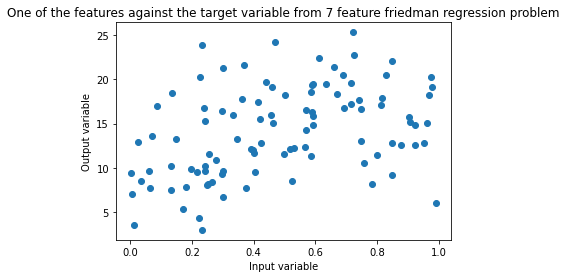

In [ ]:
plt.scatter(X_Friedman[:,1],y_Friedman)
plt.title('One of the features against the target variable from 7 feature friedman regression problem')
plt.xlabel('Input variable')
plt.ylabel('Output variable')

#### Linear Regression (without polynomial features)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_Friedman,y_Friedman,test_size=0.2,random_state=0)

In [ ]:
LinRegFriedman = LinearRegression()

In [ ]:
LinRegFriedman.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Linear regression on friedman dataset: R2 training score = ",round(LinRegFriedman.score(X_train,y_train),2))

Linear regression on friedman dataset: R2 training score =  0.72


In [ ]:
print("Linear regression on friedman dataset: R2 test score = ",round(LinRegFriedman.score(X_test,y_test),2))

Linear regression on friedman dataset: R2 test score =  0.75


#### Linear Model (Polynomial features)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polyfeat = PolynomialFeatures(degree=3)

In [ ]:
X_Friedman_poly = polyfeat.fit_transform(X_Friedman)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_Friedman_poly,y_Friedman,test_size=0.2,random_state=0)

In [ ]:
PolyFeatLinReg = LinearRegression()

In [ ]:
PolyFeatLinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
PolyFeatLinReg.score(X_train,y_train)

1.0

In [ ]:
PolyFeatLinReg.score(X_test,y_test)

0.8079500649754839

#### Regularized Linear Model with Polynomial features

In [ ]:
polyfeat = PolynomialFeatures(degree=3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_Friedman_poly,y_Friedman,test_size=0.2,random_state=0)

In [ ]:
PolyFeatRidgeReg = Ridge()

In [ ]:
PolyFeatRidgeReg.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print("Ridge regression on friedman dataset: R2 training score = ",round(PolyFeatRidgeReg.score(X_train,y_train),2))

Ridge regression on friedman dataset: R2 training score =  0.9


In [ ]:
print("Ridge regression on friedman dataset: R2 training score = ",round(PolyFeatRidgeReg.score(X_test,y_test),2))

Ridge regression on friedman dataset: R2 training score =  0.92


Todo :
* Try different degree of polynomial features.

* Try Lasso Regression too. 

References: 
1. Applied Machine Learning in Python - Coursera 